In [ ]:
import sys
sys.path.append('..')
import cv2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def triangle(a, b, c, z):
    '''
    a : maximum point
    b, c : range of membership function
    z : input
    '''
    if z > a and z<= a+c:
        return 1-(z-a)/c
    elif z <=a and z>= a-b:
        return 1-(a-z)/b
    else : return 0
    
def trapezoidal(a, b, c, d, z):
    '''
    a : maximum point
    b, c : range of membership function
    z : input
    '''
    if z>= a-b and z < a:
        return 1-(a-z)/b
    elif z>=a and z<c:
        return 1
    elif z>=c and z<= c+d:
        return 1-(z-c)/d
    else : return 0
    
def Sigma(a, b, z):
    '''
    a : 1 point
    b : zero point
    '''
    if z>=a-b and z<=a:
        return 1-(a-z)/b
    elif z > a:
        return 1
    else : return 0

def s_shape(a, b, c, z):
    '''
    a : 0 point
    b : 0.5 point
    c : 1 point
    '''
    if z<a : return 0
    elif z>=a and z<=b:
        return 2*((z-a)/(c-a))**2
    elif z > b and z<=c:
        return 1-2*((z-c)/(c-a))**2
    else : return 1
    
def bell(b, c, z):
    '''
    b : 0.5 point
    c : center point
    '''
    if z<=c:
        return s_shape(c-b, (c-b)/2, c, z)
    else : 
        return 1- s_shape(c, (c+b)/2, c+b, z)

def gaussian(a, b, c, z):
    '''
    a : 1 point
    b : width of 0.607 values 
    c : zeor point
    '''
    if z>= a-c and z<= a+c:
        up = ((z-a)/(2*b))**2
        return np.exp(-up)
    else : return 0

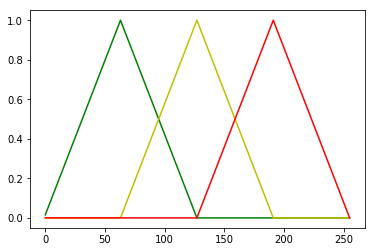

In [3]:
z_c = np.arange(0,256)
#z_c.sort()
z_tri1 = []
z_tri2 = []
z_tri3 = []
for i in z_c:
    z_tri1.append(triangle(63, 64, 64, i))
for i in z_c:
    z_tri2.append(triangle(127, 64, 64, i))
for i in z_c:
    z_tri3.append(triangle(191, 64, 64, i))

z_tri1 = np.array(z_tri1)
z_tri2 = np.array(z_tri2)
z_tri3 = np.array(z_tri3)

plt.plot(z_c, z_tri1, 'g-')
plt.plot(z_c, z_tri2, 'y-')
plt.plot(z_c, z_tri3, 'r-')
plt.show()

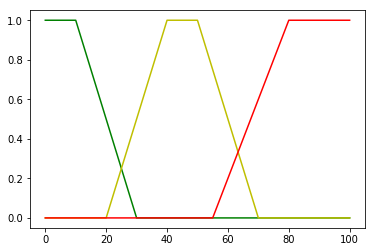

In [4]:
v = np.arange(0,101)
v_tra1 = []
v_tra2 = []
v_tra3 = []

for i in v:
    v_tra1.append(trapezoidal(0, 5, 10, 20,i))
for i in v:
    v_tra2.append(trapezoidal(40, 20, 50, 20,i))
for i in v:
    v_tra3.append(trapezoidal(80, 25, 100, 10,i))

v_tra1 = np.array(v_tra1)
v_tra2 = np.array(v_tra2)
v_tra3 = np.array(v_tra3)

plt.plot(v, v_tra1, 'g-')
plt.plot(v, v_tra2, 'y-')
plt.plot(v, v_tra3, 'r-')
plt.show()

In [5]:
print(z_tri1.shape)
print(v_tra1.shape)

(256,)
(101,)


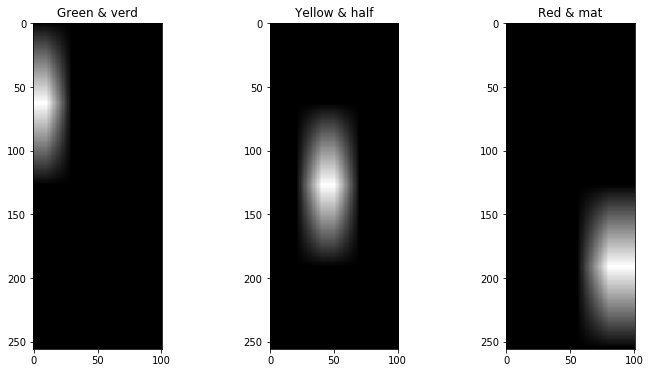

In [24]:
Q1 = np.expand_dims(z_tri1, 1)*np.expand_dims(v_tra1, 1).T

Q2 = np.expand_dims(z_tri2, 1)*np.expand_dims(v_tra2, 1).T

Q3 = np.expand_dims(z_tri3, 1)*np.expand_dims(v_tra3, 1).T
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.title("Green & verd")
plt.imshow(Q1, cmap='gray')

plt.subplot(132)
plt.title("Yellow & half")
plt.imshow(Q2, cmap='gray')


plt.subplot(133)
plt.title("Red & mat")
plt.imshow(Q3, cmap='gray')


plt.show()

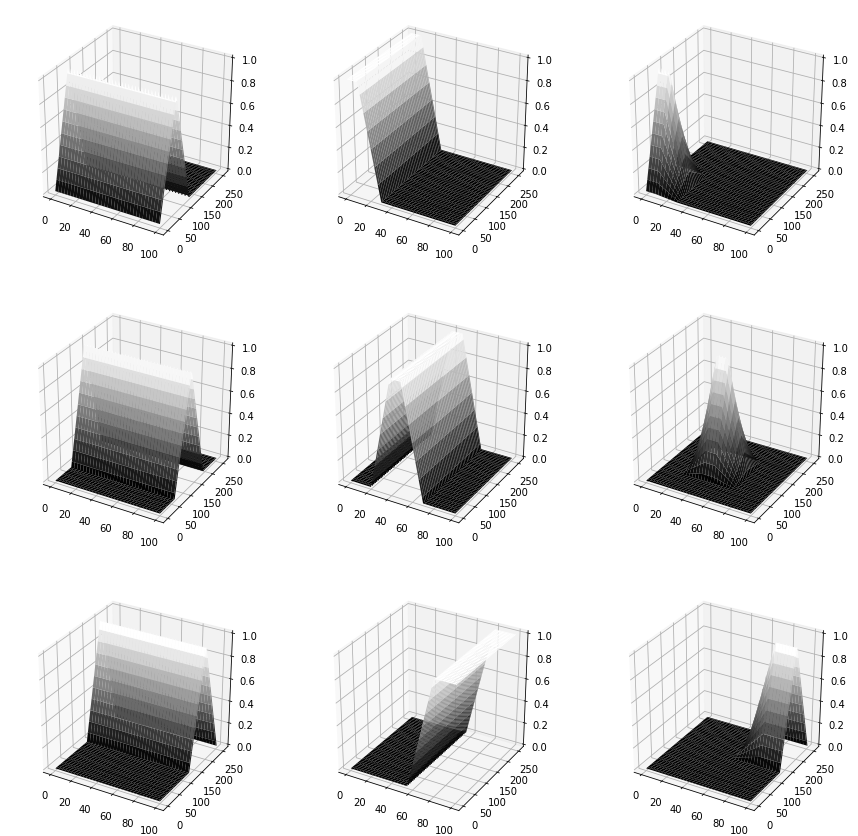

In [55]:
m1_val = np.expand_dims(z_tri1, 1)*np.expand_dims(v_tra1, 1).T
m2_val = np.expand_dims(z_tri2, 1)*np.expand_dims(v_tra2, 1).T
m3_val = np.expand_dims(z_tri3, 1)*np.expand_dims(v_tra3, 1).T

_x = np.arange(101)
_y = np.arange(256)

fig = plt.figure(figsize=(15,15))

_x, _y = np.meshgrid(_x, _y)

ax = fig.add_subplot(3, 3, 1, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(z_tri1, 1),(1, 101)), cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 2, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(v_tra1, 1),(1, 256)).T, cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 3, projection='3d')
ax.plot_surface(_x, _y, m1_val, cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 4, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(z_tri2, 1),(1, 101)), cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 5, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(v_tra2, 1),(1, 256)).T, cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 6, projection='3d')
ax.plot_surface(_x, _y, m2_val, cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 7, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(z_tri3, 1),(1, 101)), cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 8, projection='3d')
ax.plot_surface(_x, _y, np.tile(np.expand_dims(v_tra3, 1),(1, 256)).T, cmap=plt.cm.gray)

ax = fig.add_subplot(3, 3, 9, projection='3d')
ax.plot_surface(_x, _y, m3_val, cmap=plt.cm.gray)



plt.show()

In [59]:
z0 = 170

mrz0 = triangle(191, 64, 64, z0)

myz0 = triangle(127, 64, 64, z0)

mgz0 = triangle(63, 64, 64, z0)

q3 = m3_val.copy()
q3[q3>=mrz0] = mrz0

q2 = m2_val.copy()
q2[q2>=myz0] = myz0

q1 = m1_val.copy()
q1[q1>=mgz0] = mgz0

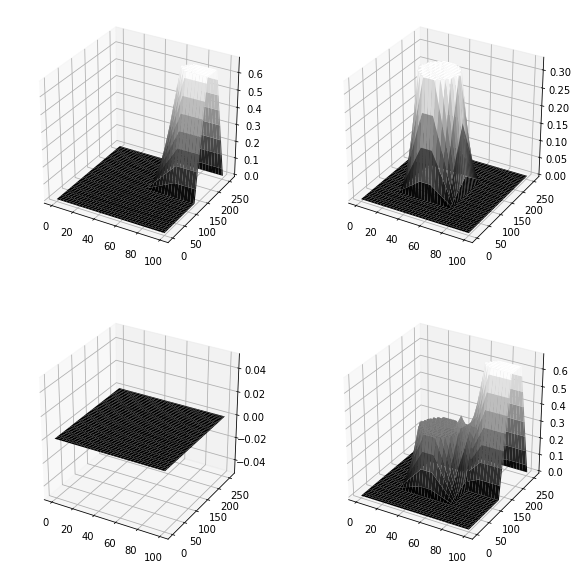

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(_x, _y, q3, cmap=plt.cm.gray)

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(_x, _y, q2, cmap=plt.cm.gray)

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(_x, _y, q1, cmap=plt.cm.gray)

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(_x, _y, q1+q2+q3, cmap=plt.cm.gray)

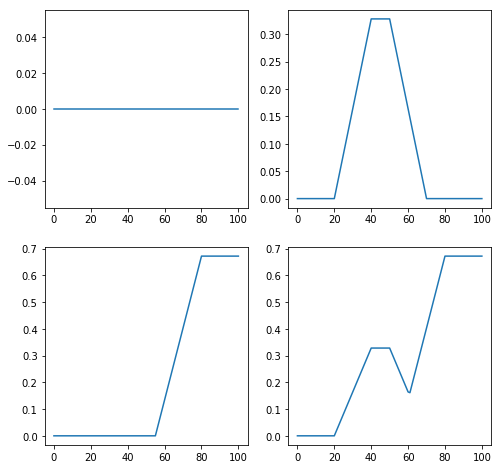

In [79]:
qv_tra1 = v_tra1 * mgz0
qv_tra2 = v_tra2 * myz0
qv_tra3 = v_tra3 * mrz0

qv_tra = np.array([])
for i in range(len(qv_tra1)):
    qv_tra=np.append(qv_tra, max(qv_tra1[i], qv_tra2[i],qv_tra3[i]))
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(qv_tra1)
plt.subplot(2,2,2)
plt.plot(qv_tra2)
plt.subplot(2,2,3)
plt.plot(qv_tra3)
plt.subplot(2,2,4)
plt.plot(qv_tra)